## Business case :- To predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game.

## About the dataset :-

  - The data set is related and deals with pubg game.
  - It is shows the wining preditions of the player by using their stats.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('pubg.csv')

In [3]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


## Domian Analysis

1) DBNOs - Number of enemy players knocked.


2) Assists - Number of enemy players this player damaged that were killed by teammates.


3) Boosts - Number of boost items used.


4) DamageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.


5) HeadshotKills - Number of enemy players killed with headshots.


6)  Heals - Number of healing items used.

7) Id - Player’s Id

8) KillPlace - Ranking in match of number of enemy players killed.

9) KillPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

10) KillStreaks - Max number of enemy players killed in a short amount of time.

11) Kills - Number of enemy players killed.

12) longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

13) MatchDuration - Duration of match in seconds.

14) MatchId - ID to identify match. There are no matches that are in both the training and testing set.

15) MatchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

16) RankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

17) Revives - Number of times this player revived teammates.

18) RideDistance - Total distance traveled in vehicles measured in meters.

19) RoadKills - Number of kills while in a vehicle.

20) SwimDistance - Total distance traveled by swimming measured in meters.

21) TeamKills - Number of times this player killed a teammate.

22) VehicleDestroys - Number of vehicles destroyed.

23) WalkDistance - Total distance traveled on foot measured in meters.

24) WeaponsAcquired - Number of weapons picked up.

25) WinPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

26) GroupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

27) NumGroups - Number of groups we have data for in the match.

28) MaxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

29) WinPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

## Basic checks

In [4]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [7]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [8]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [9]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


## EDA

### Univarite Analysis

In [10]:
import sweetviz as sv

report=sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Bivariate Analysis

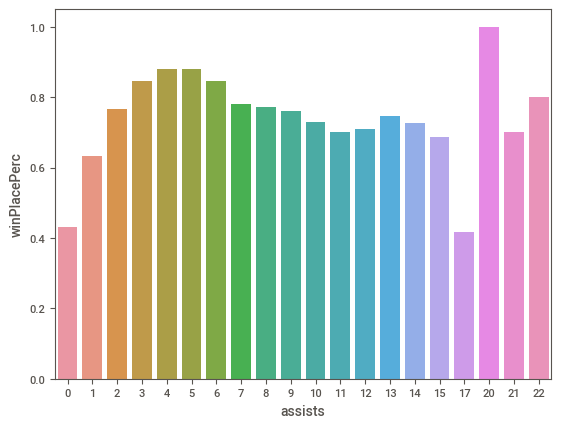

In [11]:
sns.barplot(data=data,x='assists',y='winPlacePerc',ci=None)    ## ci=confidence interval
plt.show()

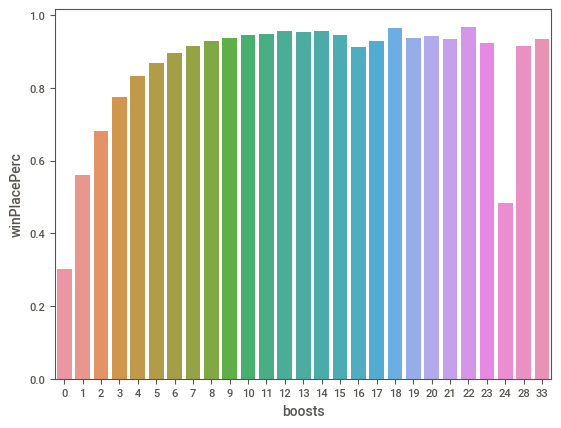

In [12]:
sns.barplot(data=data,x='boosts',y='winPlacePerc',ci=None)    ## ci=confidence interval
plt.show()

mean 1579.5064396714524
median 1438.0
minimum value 9
maximum value 2237


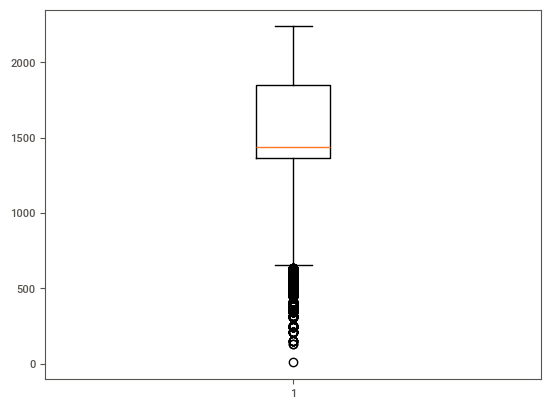

In [13]:
print('mean',data['matchDuration'].mean())
print('median',data['matchDuration'].median())
print('minimum value',data['matchDuration'].min())
print('maximum value',data['matchDuration'].max())

plt.boxplot(data['matchDuration'])
plt.show()

- In matchduration we can see we have many values which are extremely low. These are called outliers.Boxplot helps to identify the outliers.
- And it also tells the mean ,median and IQR.

<Axes: xlabel='matchDuration', ylabel='Density'>

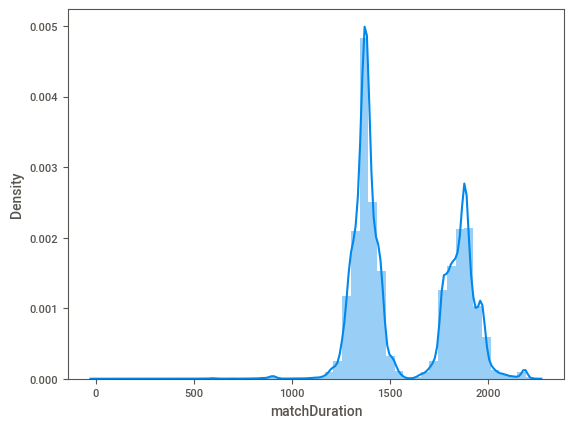

In [14]:
# We can see the disburtion plot as well of matchDuration

sns.distplot(data['matchDuration'])

<function matplotlib.pyplot.show(close=None, block=None)>

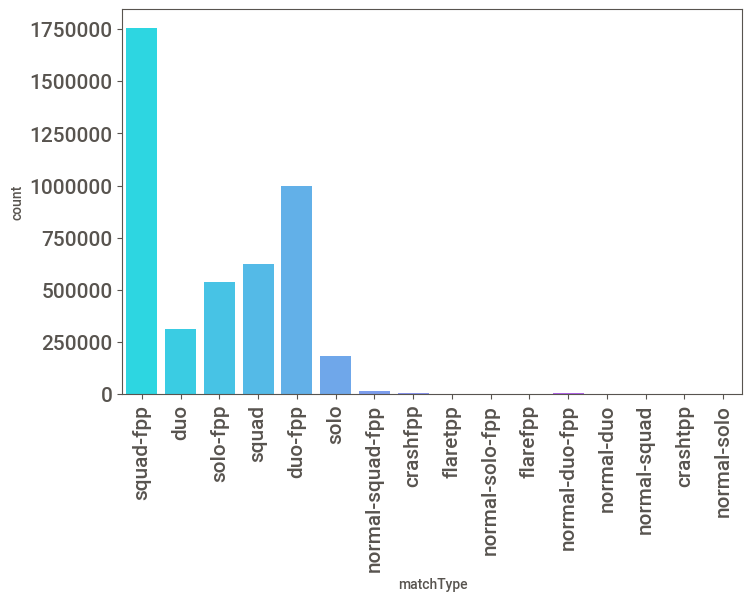

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='matchType', data=data, palette='cool')
plt.xticks(fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.show

- Most of the players play the squad-fpp
- very low no of players play the squad compared to squad fpp.

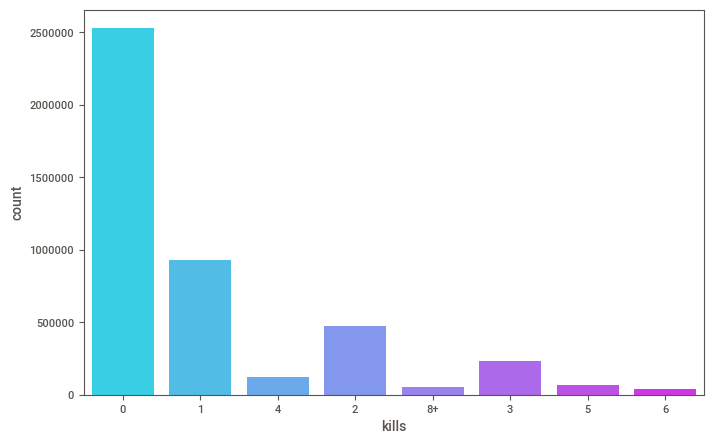

In [16]:
data1 = data.copy()
data1.loc[data1['kills'] > data1['kills'].quantile(0.98), 'kills'] = '8+'
data1['kills'] = data1['kills'].astype(str).sort_values()

plt.figure(figsize=(8, 5))
sns.countplot(x='kills', data=data1, palette='cool')
plt.show()

- The count of 0 kills are very high and as kills are increasing the count is decreasing.

<Axes: xlabel='kills', ylabel='count'>

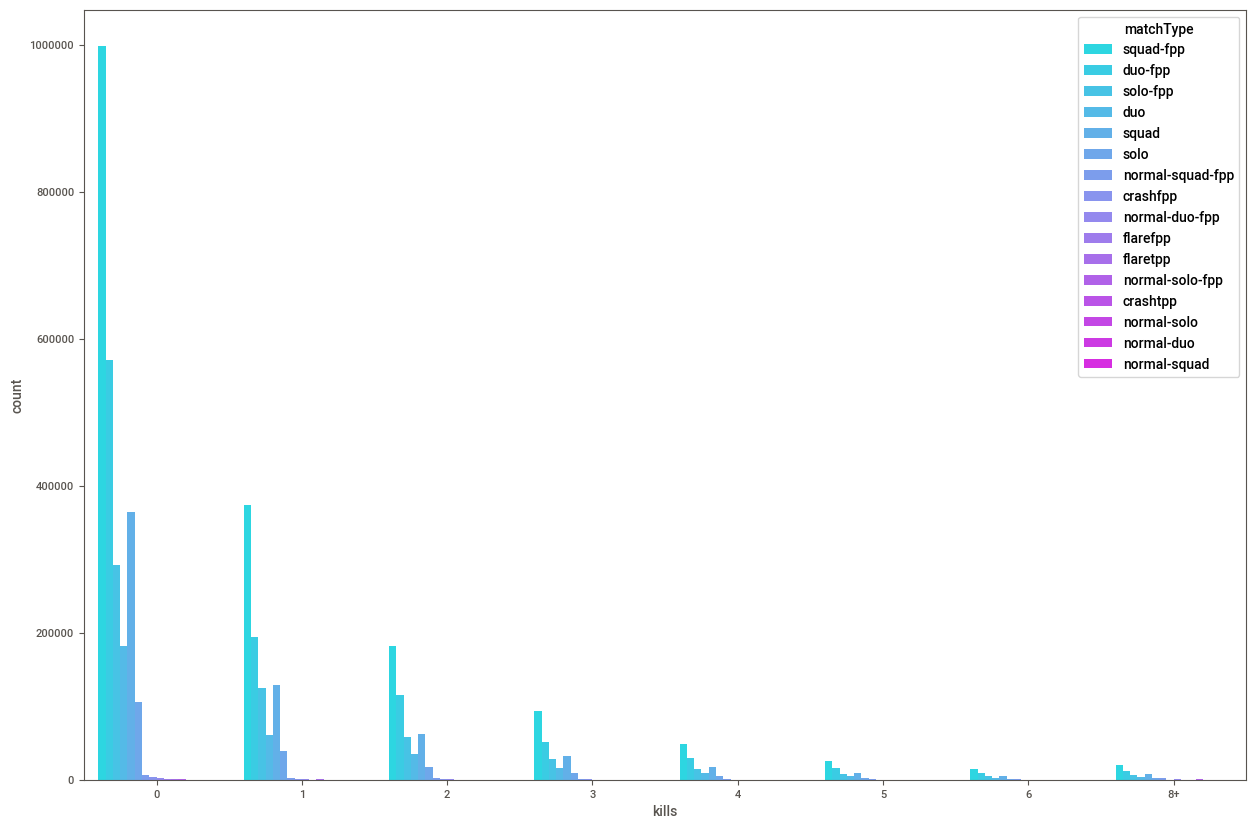

In [17]:
# Make a copy of the original data
datal = data.copy()
datal.loc[datal['kills'] > datal['kills'].quantile(0.98), 'kills'] = '8+'
datal['kills'] = datal['kills'].astype(str)
sorted_data = datal.sort_values('kills')
plt.figure(figsize=(15, 10))
sns.countplot(x='kills', data=sorted_data, palette='cool', hue='matchType')

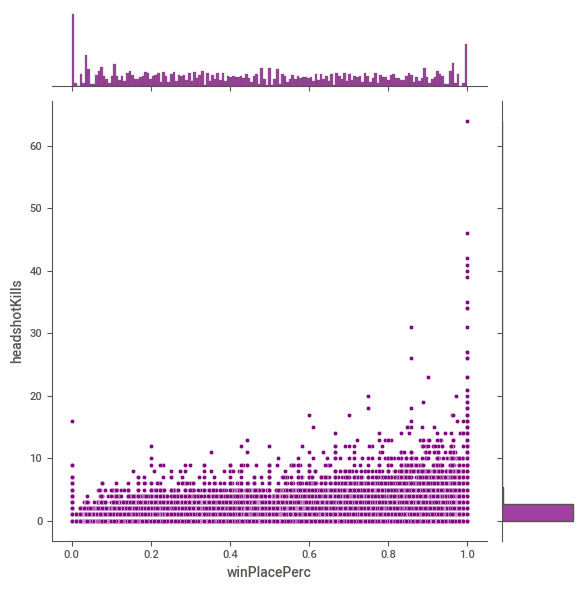

In [18]:
sns.jointplot(x='winPlacePerc', y='headshotKills', data=data, color='purple')

- The chances of winning of those people are high who are killing enemies by headshot.

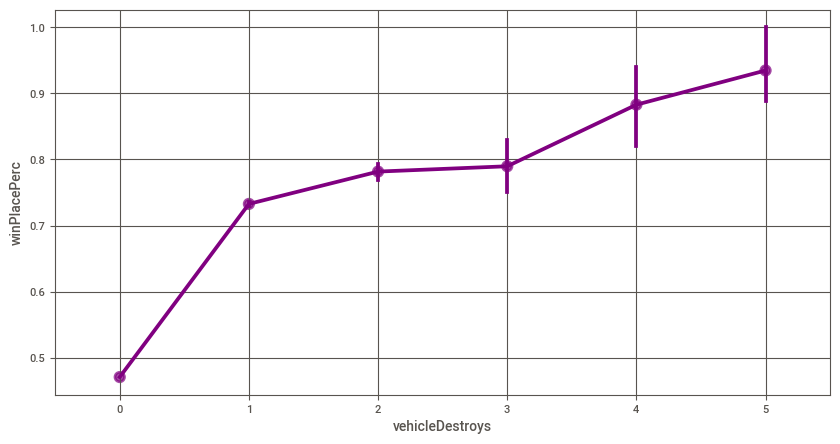

In [19]:
plt.subplots(figsize=(10, 5))
sns.pointplot(x='vehicleDestroys', y='winPlacePerc', data=data, color='purple')
plt.gca().collections[0].set_alpha(0.7)
plt.grid()
plt.show()

- The chances of winning are higher when people are destroying vechiles.

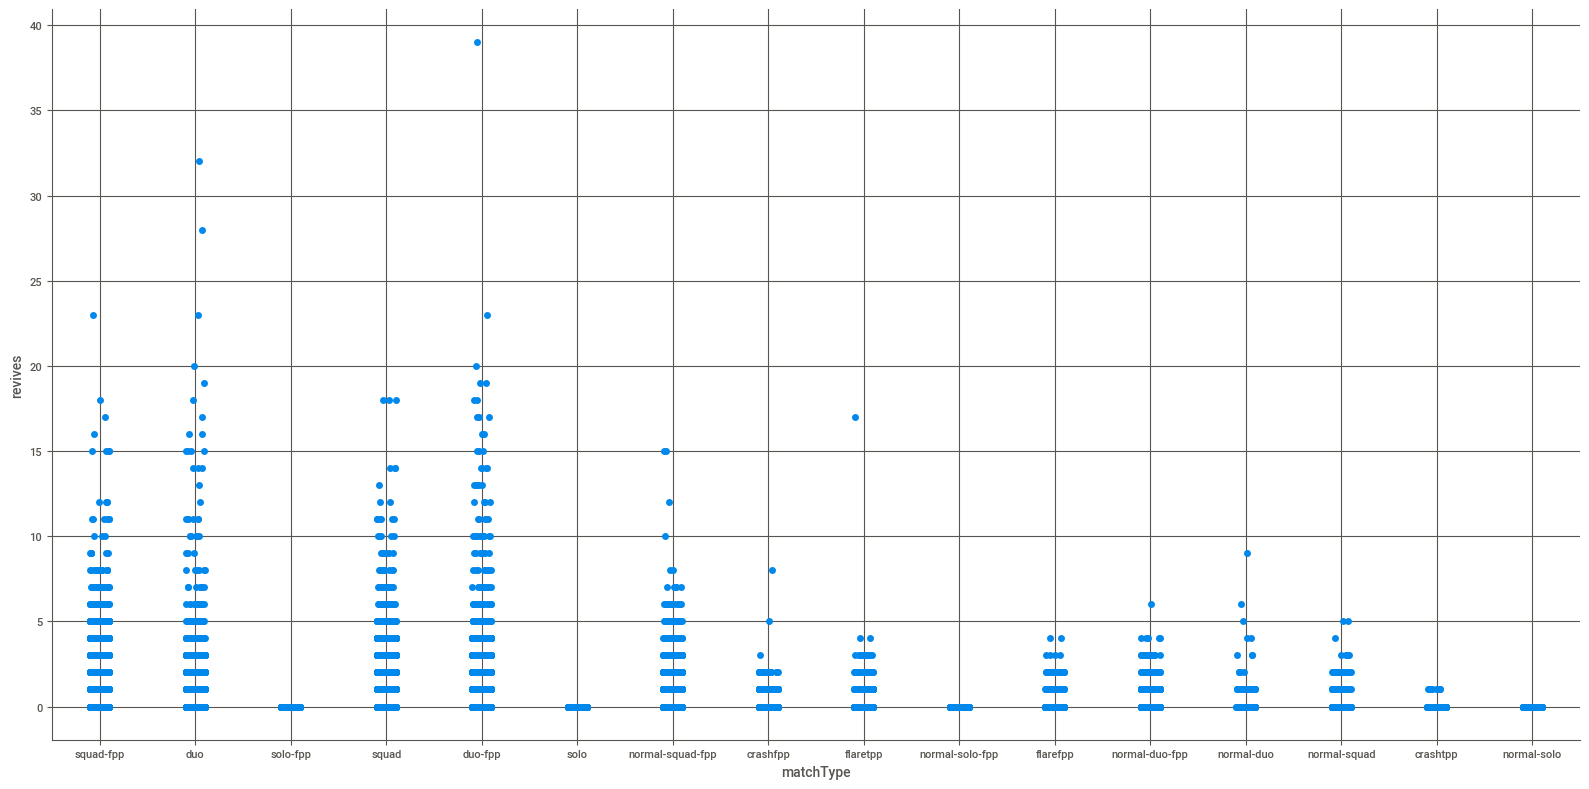

In [20]:
sns.catplot(x='matchType',y='revives',data=data,height=8,aspect=2)
plt.grid()
plt.show()

### Multivariate Analysis

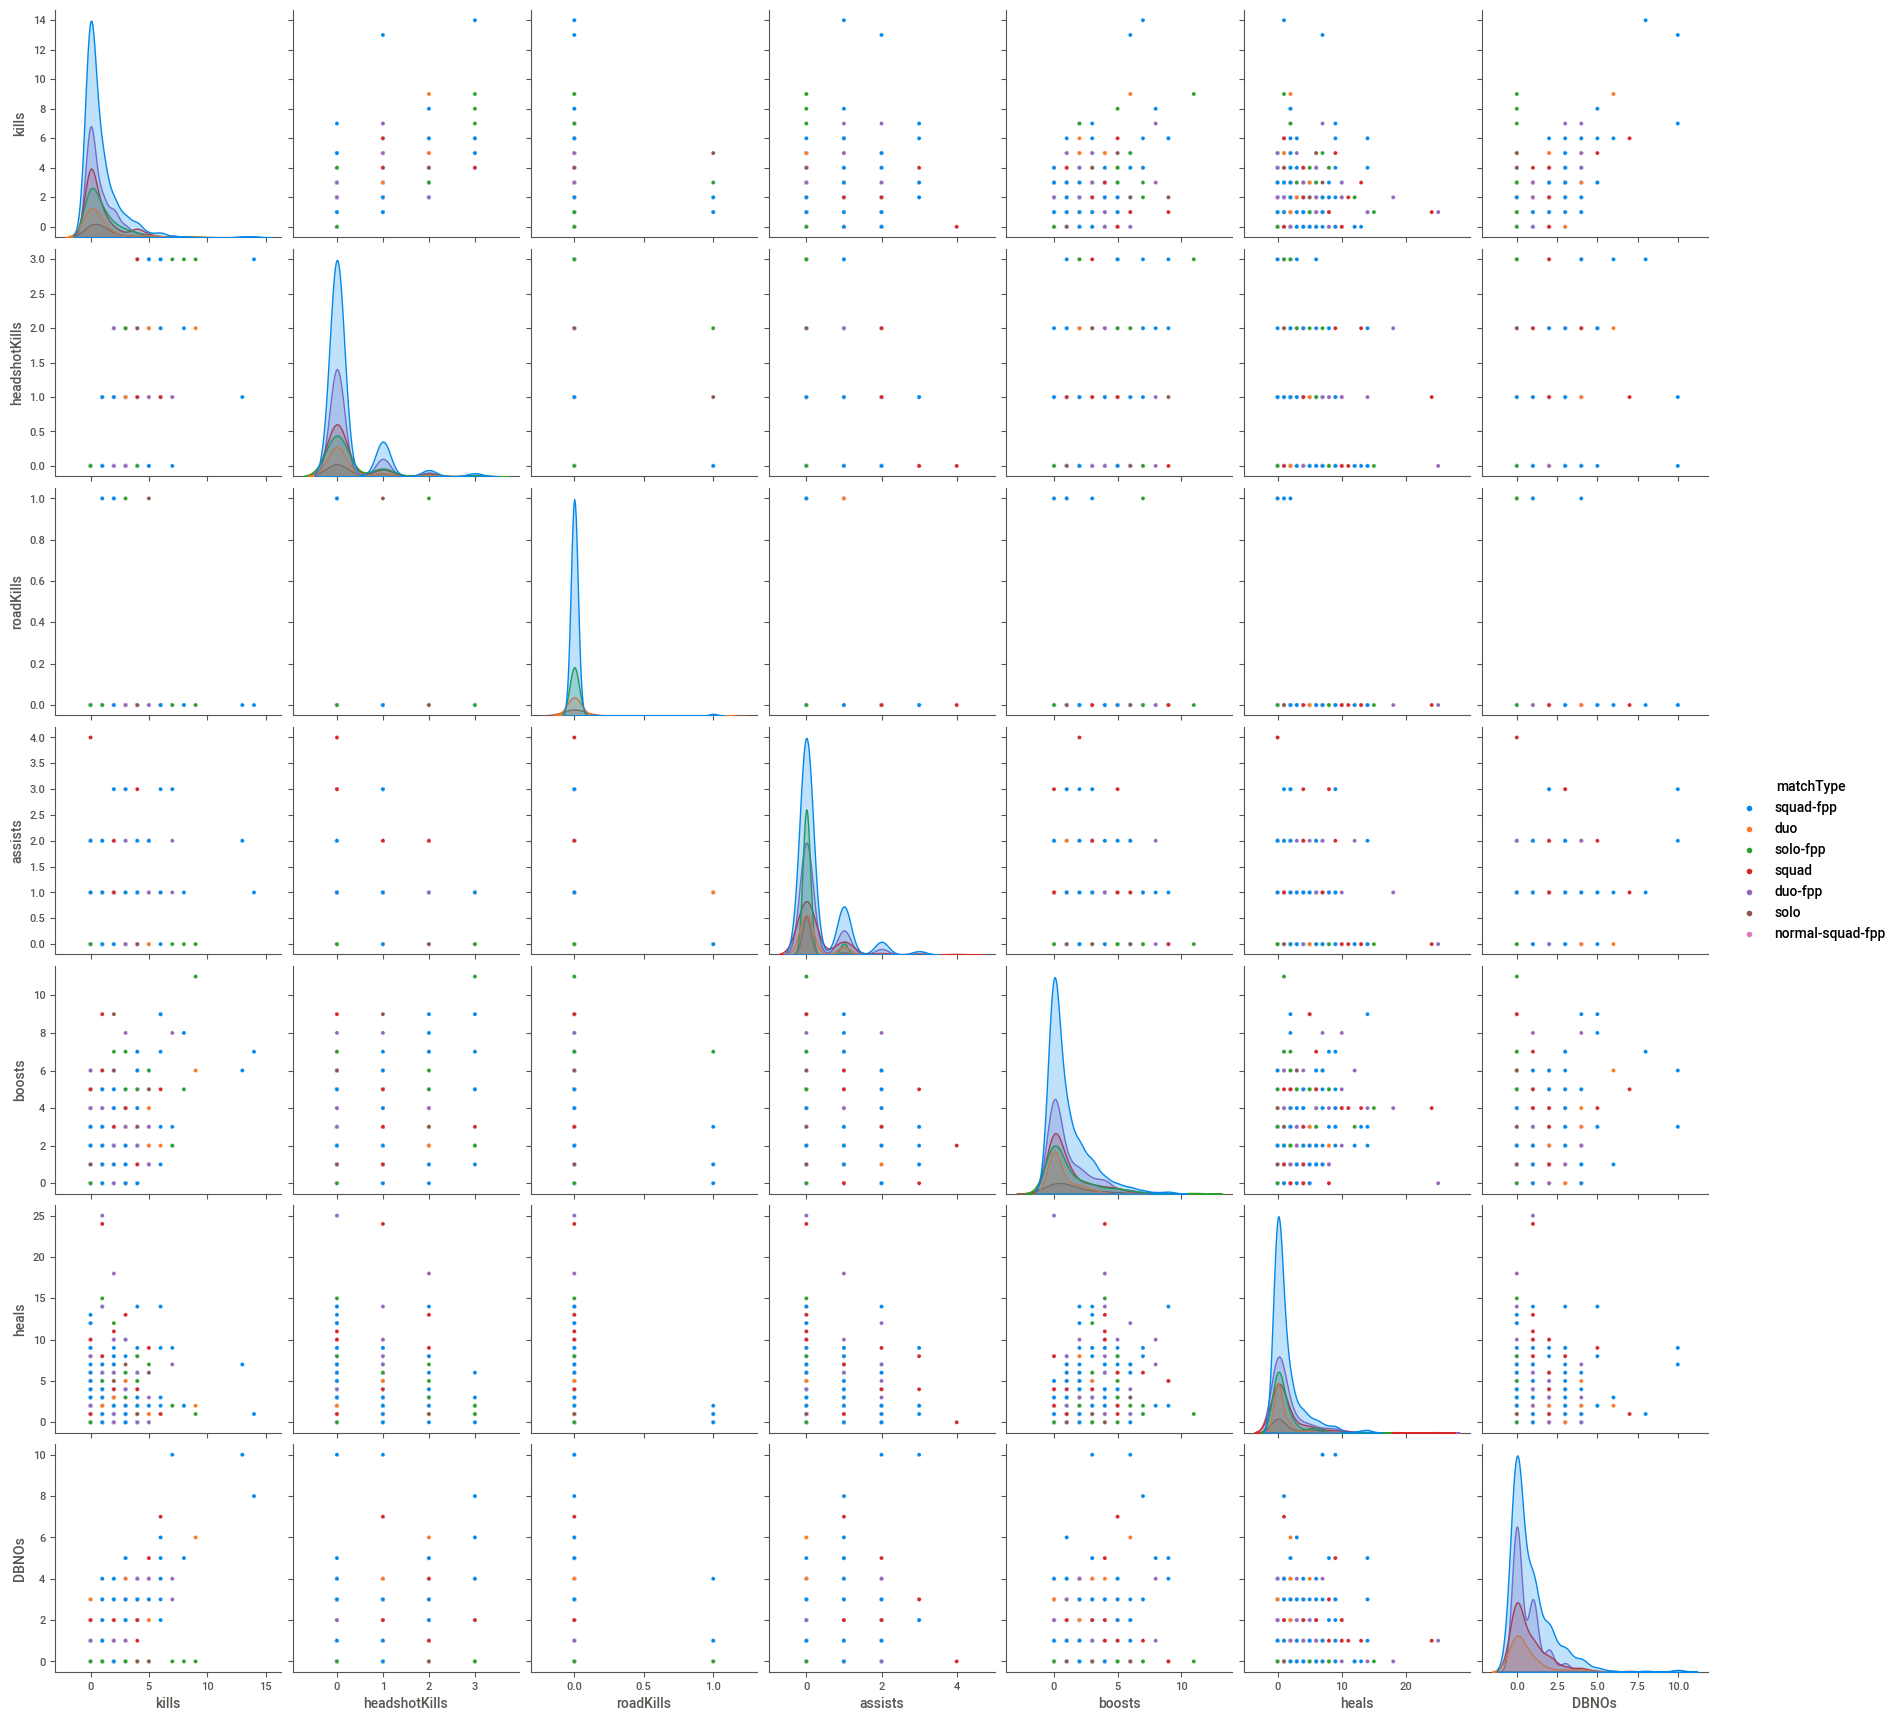

In [21]:
data1= data[['kills','headshotKills','roadKills','assists','boosts','heals','DBNOs','matchType']]
sns.pairplot(data1[:1000], hue='matchType')

## Data Preprocessing

In [22]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [23]:
# Handle missing values
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [24]:
#data_cleaned = data.dropna(subset=['winPlacePerc'])

In [25]:
data_cleaned=data

In [26]:
data_cleaned.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [27]:
data_cleaned.drop(columns=['Id',
                    'groupId',
                    'matchId',
                    'rideDistance',
                    'swimDistance',
                    'walkDistance',
                    'killPoints',
                    'rankPoints',
                    'winPoints'],inplace=True)

## Encoding

In [28]:
data_cleaned['matchType']=data_cleaned.matchType.replace({'squad-fpp':0, 'duo':1, 'solo-fpp':2, 'squad':3, 'duo-fpp':4, 'solo':5,
       'normal-squad-fpp':6, 'crashfpp':7, 'flaretpp':8, 'normal-solo-fpp':9,
       'flarefpp':10, 'normal-duo-fpp':11, 'normal-duo':12, 'normal-squad':13,
       'crashtpp':14, 'normal-solo':15})

In [29]:
data_cleaned

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,60,0,0,0.00,1306,0,28,26,0,0,0,0,1,0.4444
1,0,0,91.47,0,0,0,57,0,0,0.00,1777,0,26,25,0,0,0,0,5,0.6400
2,1,0,68.00,0,0,0,47,0,0,0.00,1318,1,50,47,0,0,0,0,2,0.7755
3,0,0,32.90,0,0,0,75,0,0,0.00,1436,0,31,30,0,0,0,0,3,0.1667
4,0,0,100.00,0,0,0,45,1,1,58.53,1424,2,97,95,0,0,0,0,2,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,0,0,0.00,1873,0,29,28,0,0,0,0,3,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0.00,1435,5,93,93,0,0,0,0,6,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0.00,1321,0,28,28,0,0,0,0,4,0.4815
4446964,0,4,180.40,1,1,2,11,2,1,98.50,1373,0,26,25,2,0,0,0,8,0.8000


In [30]:
data2=data[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','kills','killStreaks','teamKills',
          'longestKill','matchDuration','maxPlace','revives','roadKills','vehicleDestroys','weaponsAcquired','winPlacePerc','numGroups']]

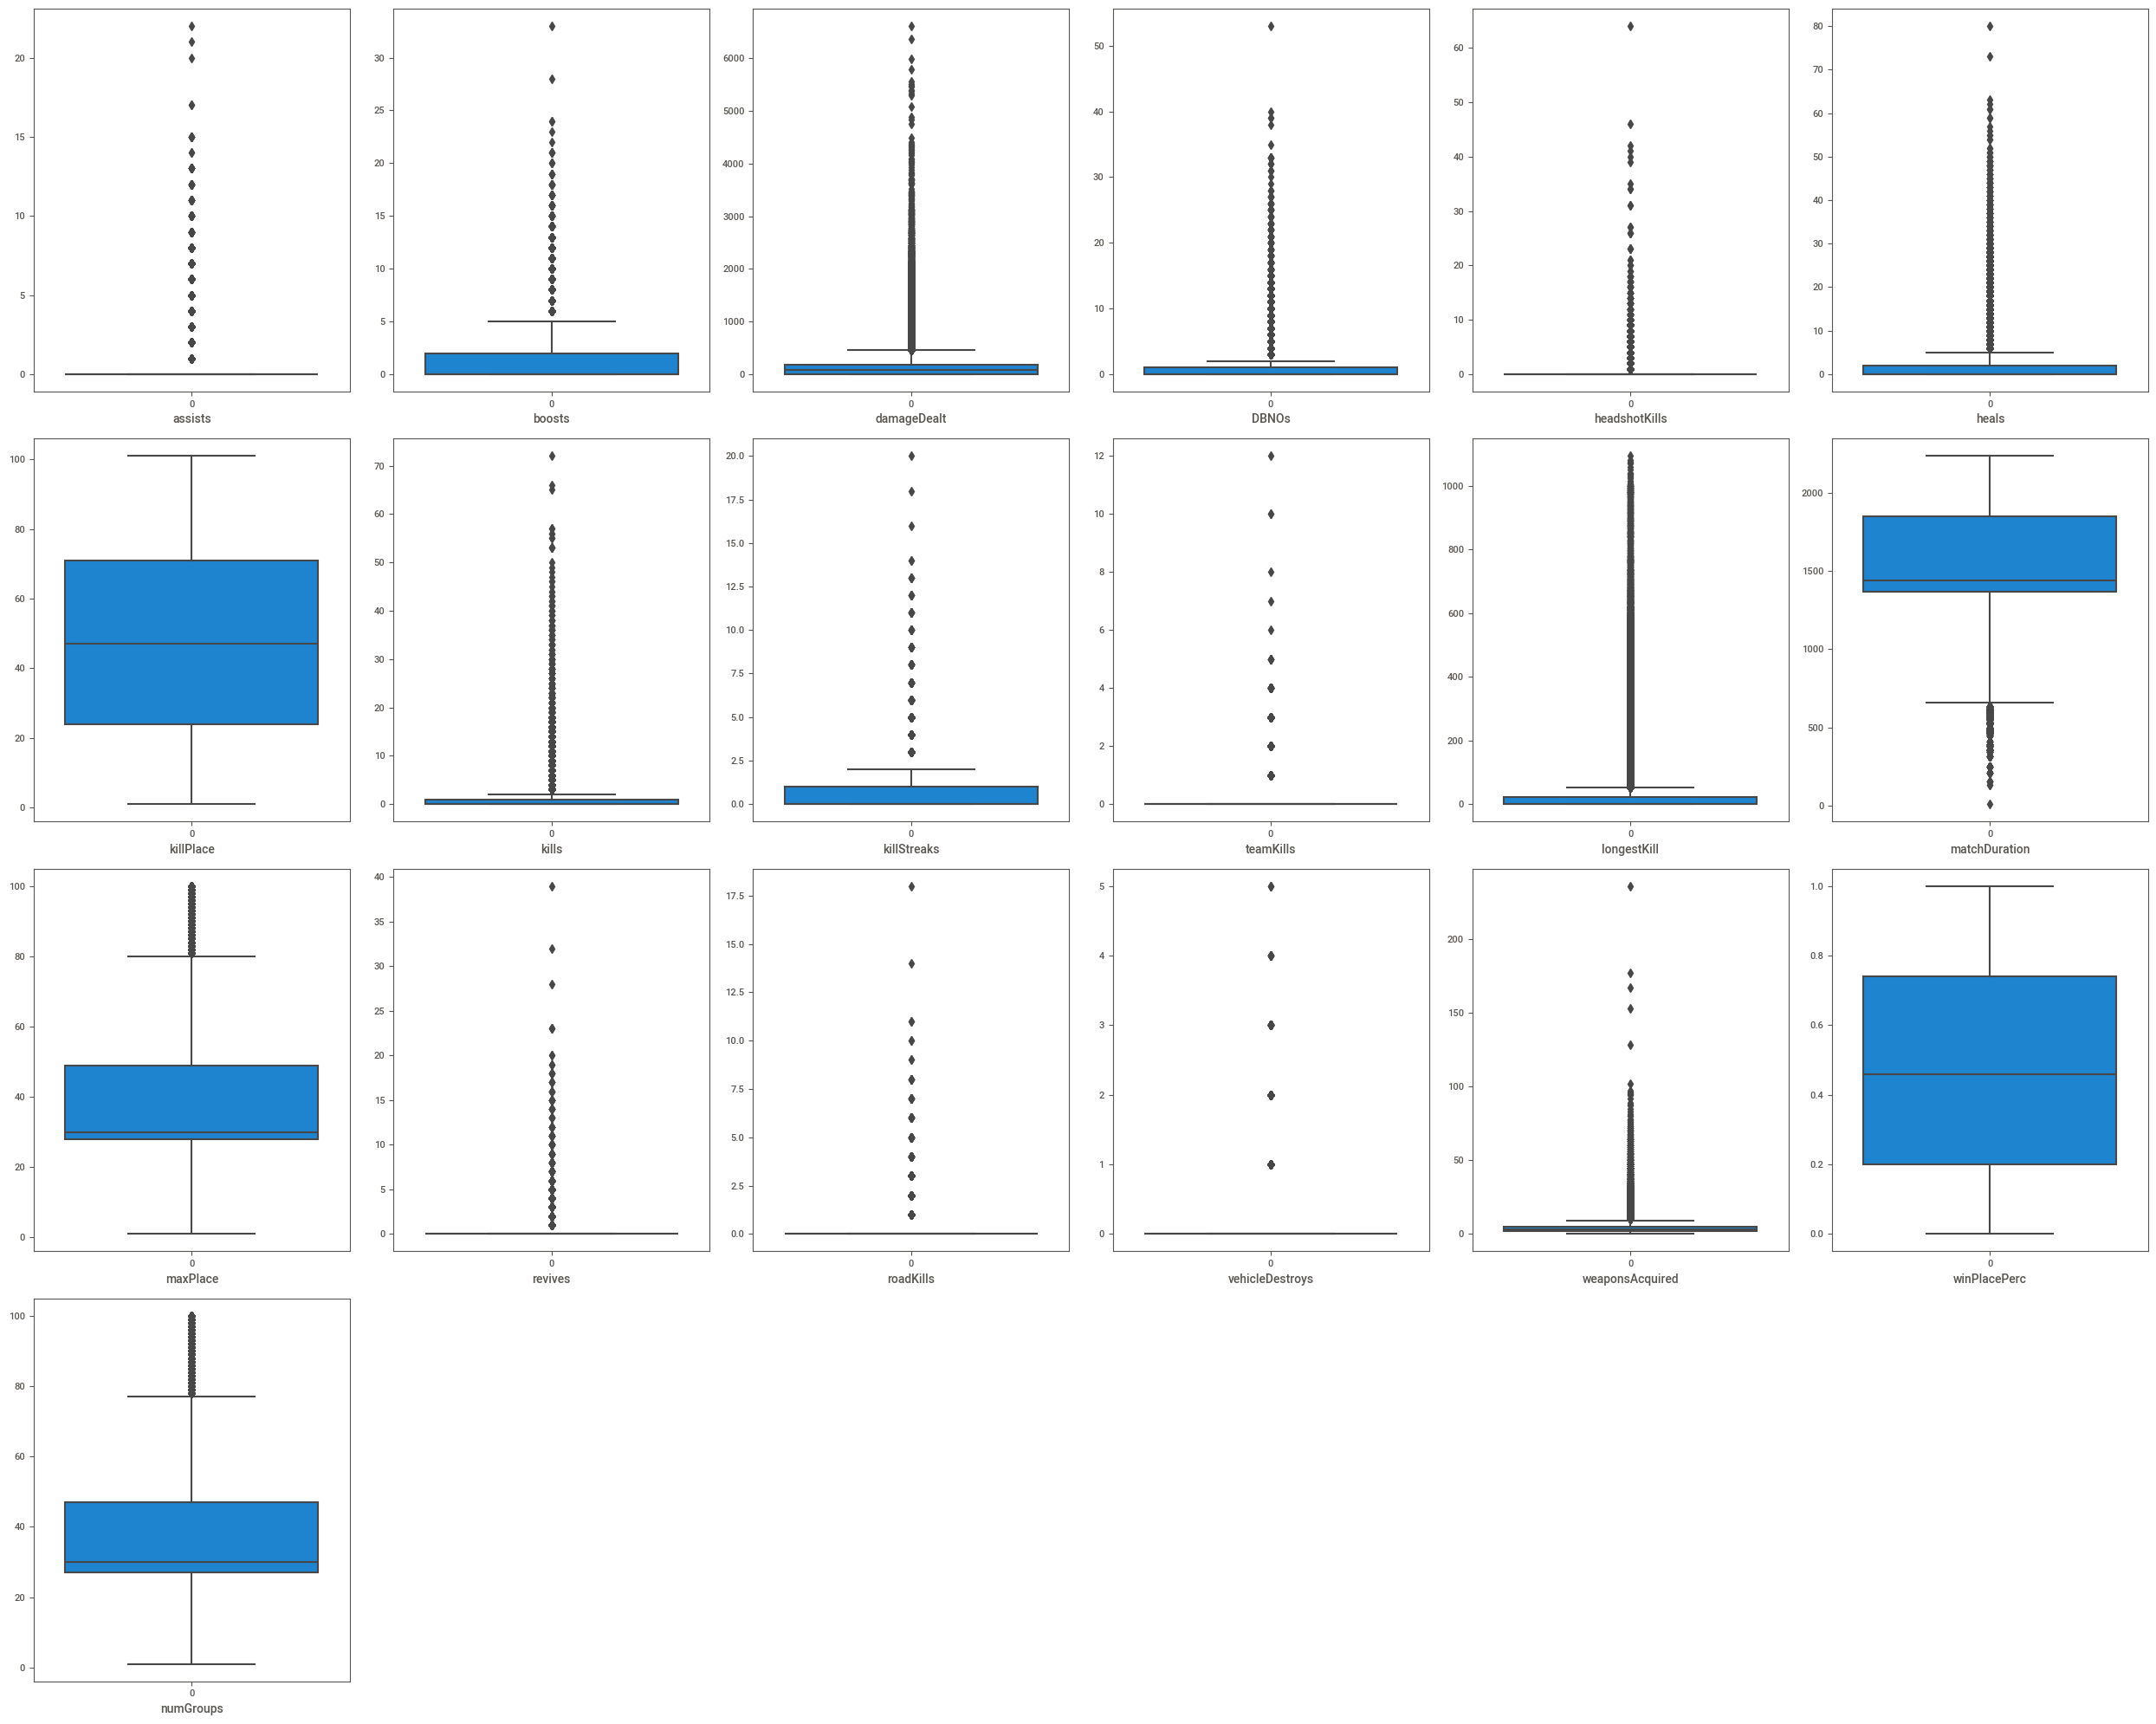

In [31]:
plt.figure(figsize=(25,20),facecolor='white')

plotnumber=1

for column in data2:
    if plotnumber<=24 :
        ax=plt.subplot(4,6,plotnumber)
        sns.boxplot(data2[column])
        plt.xlabel(column)
       
    plotnumber+=1
plt.tight_layout()

In [32]:
Q1 = data2.quantile(0.25)  # np.percentile(data,25)

Q3 = data2.quantile(0.75)

IQR = Q3-Q1

min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

outliers_count = ((data2 > max_limit) | (data2 < min_limit)).sum()

outliers_percentage = (outliers_count/len(data2))*100

print('\n Sum of Outliers:\n ',outliers_count)
print('\n Percentage of Outliers:\n ',outliers_percentage)


 Sum of Outliers:
  assists            779306
boosts             142191
damageDealt        215546
DBNOs              294831
headshotKills      750850
heals              326055
killPlace               0
kills              516699
killStreaks         52340
teamKills           96930
longestKill        614427
matchDuration        2626
maxPlace           701861
revives            587099
roadKills           12996
vehicleDestroys     33754
weaponsAcquired     78409
winPlacePerc            0
numGroups          698800
dtype: int64

 Percentage of Outliers:
  assists            17.524443
boosts              3.197483
damageDealt         4.847035
DBNOs               6.629936
headshotKills      16.884546
heals               7.332078
killPlace           0.000000
kills              11.619135
killStreaks         1.176982
teamKills           2.179688
longestKill        13.816769
matchDuration       0.059051
maxPlace           15.782918
revives            13.202237
roadKills           0.292244
vehicleDe

In [33]:
import pandas as pd
from scipy.stats import zscore

# Define your data as a dictionary
data3 = {
'assists':17.524443,
'boosts' :3.197483,
'damageDealt':4.847035,
'DBNOs':6.629936,
'headshotKills':16.884546,
'heals':7.332078,
'killPlace':0.000000,
'kills':11.619135,
'killStreaks':1.176982,
'teamKills':2.179688,
'longestKill':13.816769,
'matchDuration':0.059051,
'maxPlace':15.782918,
'revives':13.202237,
'roadKills':0.292244,
'vehicleDestroys':0.759034,
'weaponsAcquired':1.763202,
'numGroups' :15.714085,
'winPlacePerc':0.000000
    
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data3, index=[0])

# Calculate Z-scores for each column
z_scores = df.apply(zscore)

# Define a threshold for Z-score (e.g., ±3)
threshold = 3

# Identify outliers based on Z-scores
outliers = df[(z_scores > threshold).any(axis=1)]

# Remove outliers
cleaned_df = df[(z_scores <= threshold).all(axis=1)]

print("Outliers:")
print(outliers)
print("\nCleaned DataFrame:")
print(cleaned_df)

Outliers:
Empty DataFrame
Columns: [assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, kills, killStreaks, teamKills, longestKill, matchDuration, maxPlace, revives, roadKills, vehicleDestroys, weaponsAcquired, numGroups, winPlacePerc]
Index: []

Cleaned DataFrame:
Empty DataFrame
Columns: [assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, kills, killStreaks, teamKills, longestKill, matchDuration, maxPlace, revives, roadKills, vehicleDestroys, weaponsAcquired, numGroups, winPlacePerc]
Index: []


In [34]:
Q1 = df.quantile(0.25)  # np.percentile(data,25)

Q3 = df.quantile(0.75)

IQR = Q3-Q1

min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

outliers_count = ((df > max_limit) | (df < min_limit)).sum()

outliers_percentage = (outliers_count/len(df))*100

print('\n Sum of Outliers:\n ',outliers_count)
print('\n Percentage of Outliers:\n ',outliers_percentage)


 Sum of Outliers:
  assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
kills              0
killStreaks        0
teamKills          0
longestKill        0
matchDuration      0
maxPlace           0
revives            0
roadKills          0
vehicleDestroys    0
weaponsAcquired    0
numGroups          0
winPlacePerc       0
dtype: int64

 Percentage of Outliers:
  assists            0.0
boosts             0.0
damageDealt        0.0
DBNOs              0.0
headshotKills      0.0
heals              0.0
killPlace          0.0
kills              0.0
killStreaks        0.0
teamKills          0.0
longestKill        0.0
matchDuration      0.0
maxPlace           0.0
revives            0.0
roadKills          0.0
vehicleDestroys    0.0
weaponsAcquired    0.0
numGroups          0.0
winPlacePerc       0.0
dtype: float64


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data4 = scaler.fit_transform(data_cleaned[[ 'assists',            
'boosts',             
'damageDealt',        
'DBNOs',              
'headshotKills',      
'heals',              
'killPlace',                   
'kills',              
'killStreaks',        
'longestKill',        
'matchDuration',      
'matchType',          
'maxPlace',                    
'revives',            
'roadKills',          
'teamKills',          
'vehicleDestroys',    
'weaponsAcquired',              
'winPlacePerc',
'numGroups']])

In [36]:
data_cleaned[[ 'assists',            
'boosts',             
'damageDealt',        
'DBNOs',              
'headshotKills',      
'heals',              
'killPlace',                   
'kills',              
'killStreaks',        
'longestKill',        
'matchDuration',      
'matchType',          
'maxPlace',                    
'revives',            
'roadKills',          
'teamKills',          
'vehicleDestroys',    
'weaponsAcquired',              
'winPlacePerc',
'numGroups']]=pd.DataFrame(data4)

In [37]:
data_cleaned

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPlacePerc
0,-0.397257,-0.645129,-0.765410,-0.574191,-0.376680,-0.511252,0.451541,-0.593402,-0.765087,-0.451176,-1.057071,-1.038431,-0.692656,-0.730269,-0.348730,-0.047648,-0.142589,-0.085499,-1.083021,-0.092456
1,-0.397257,-0.645129,-0.229810,-0.574191,-0.376680,-0.511252,0.342303,-0.593402,-0.765087,-0.451176,0.763290,-1.038431,-0.776590,-0.773207,-0.348730,-0.047648,-0.142589,-0.085499,0.545283,0.543838
2,1.301767,-0.645129,-0.367238,-0.574191,-0.376680,-0.511252,-0.021824,-0.593402,-0.765087,-0.451176,-1.010693,-0.490780,0.230624,0.171425,-0.348730,-0.047648,-0.142589,-0.085499,-0.675945,0.984625
3,-0.397257,-0.645129,-0.572765,-0.574191,-0.376680,-0.511252,0.997732,-0.593402,-0.765087,-0.451176,-0.554636,-1.038431,-0.566754,-0.558518,-0.348730,-0.047648,-0.142589,-0.085499,-0.268869,-0.995825
4,-0.397257,-0.645129,-0.179863,-0.574191,-0.376680,-0.511252,-0.094649,0.048264,0.641439,0.697088,-0.601015,0.056870,2.203085,2.232441,-0.348730,-0.047648,-0.142589,-0.085499,-0.675945,-0.928162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,-0.397257,-0.645129,-0.765410,-0.574191,-0.376680,-0.511252,0.961319,-0.593402,-0.765087,-0.451176,1.134319,-1.038431,-0.650688,-0.644393,-0.348730,-0.047648,-0.142589,-0.085499,-0.268869,-0.957114
4446962,-0.397257,-0.062308,-0.506891,-0.574191,-0.376680,-0.511252,0.779256,-0.593402,-0.765087,-0.451176,-0.558501,1.699821,2.035216,2.146565,-0.348730,-0.047648,-0.142589,-0.085499,0.952359,-0.583340
4446963,-0.397257,-0.645129,-0.419586,-0.574191,-0.376680,-0.511252,0.670018,-0.593402,-0.765087,-0.451176,-0.999098,-1.038431,-0.692656,-0.644393,-0.348730,-0.047648,-0.142589,-0.085499,0.138207,0.028231
4446964,-0.397257,1.686154,0.290916,0.298605,1.284022,0.235021,-1.332682,0.689929,0.641439,1.481235,-0.798124,-1.038431,-0.776590,-0.773207,3.887059,-0.047648,-0.142589,-0.085499,1.766512,1.064324


In [38]:
data_cleaned.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
revives            0
roadKills          0
teamKills          0
vehicleDestroys    0
weaponsAcquired    0
winPlacePerc       1
dtype: int64

In [39]:
#### finding Nan record using code
import pandas as pd

# Assuming 'data_cleaned' is your DataFrame
rows_with_nan = data_cleaned[data_cleaned.isnull().any(axis=1)]

# Display rows with NaN values
print(rows_with_nan)


          assists    boosts  damageDealt     DBNOs  headshotKills     heals  \
2744604 -0.397257 -0.645129     -0.76541 -0.574191       -0.37668 -0.511252   

         killPlace     kills  killStreaks  longestKill  matchDuration  \
2744604  -1.696809 -0.593402    -0.765087    -0.451176      -6.069829   

         matchType  maxPlace  numGroups  revives  roadKills  teamKills  \
2744604    0.05687 -1.825771  -1.803714 -0.34873  -0.047648  -0.142589   

         vehicleDestroys  weaponsAcquired  winPlacePerc  
2744604        -0.085499        -1.490097           NaN  


In [40]:
data_cleaned.drop(index=2744604, inplace=True)

In [41]:
data_cleaned

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPlacePerc
0,-0.397257,-0.645129,-0.765410,-0.574191,-0.376680,-0.511252,0.451541,-0.593402,-0.765087,-0.451176,-1.057071,-1.038431,-0.692656,-0.730269,-0.348730,-0.047648,-0.142589,-0.085499,-1.083021,-0.092456
1,-0.397257,-0.645129,-0.229810,-0.574191,-0.376680,-0.511252,0.342303,-0.593402,-0.765087,-0.451176,0.763290,-1.038431,-0.776590,-0.773207,-0.348730,-0.047648,-0.142589,-0.085499,0.545283,0.543838
2,1.301767,-0.645129,-0.367238,-0.574191,-0.376680,-0.511252,-0.021824,-0.593402,-0.765087,-0.451176,-1.010693,-0.490780,0.230624,0.171425,-0.348730,-0.047648,-0.142589,-0.085499,-0.675945,0.984625
3,-0.397257,-0.645129,-0.572765,-0.574191,-0.376680,-0.511252,0.997732,-0.593402,-0.765087,-0.451176,-0.554636,-1.038431,-0.566754,-0.558518,-0.348730,-0.047648,-0.142589,-0.085499,-0.268869,-0.995825
4,-0.397257,-0.645129,-0.179863,-0.574191,-0.376680,-0.511252,-0.094649,0.048264,0.641439,0.697088,-0.601015,0.056870,2.203085,2.232441,-0.348730,-0.047648,-0.142589,-0.085499,-0.675945,-0.928162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,-0.397257,-0.645129,-0.765410,-0.574191,-0.376680,-0.511252,0.961319,-0.593402,-0.765087,-0.451176,1.134319,-1.038431,-0.650688,-0.644393,-0.348730,-0.047648,-0.142589,-0.085499,-0.268869,-0.957114
4446962,-0.397257,-0.062308,-0.506891,-0.574191,-0.376680,-0.511252,0.779256,-0.593402,-0.765087,-0.451176,-0.558501,1.699821,2.035216,2.146565,-0.348730,-0.047648,-0.142589,-0.085499,0.952359,-0.583340
4446963,-0.397257,-0.645129,-0.419586,-0.574191,-0.376680,-0.511252,0.670018,-0.593402,-0.765087,-0.451176,-0.999098,-1.038431,-0.692656,-0.644393,-0.348730,-0.047648,-0.142589,-0.085499,0.138207,0.028231
4446964,-0.397257,1.686154,0.290916,0.298605,1.284022,0.235021,-1.332682,0.689929,0.641439,1.481235,-0.798124,-1.038431,-0.776590,-0.773207,3.887059,-0.047648,-0.142589,-0.085499,1.766512,1.064324


In [42]:
data_cleaned.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
revives            0
roadKills          0
teamKills          0
vehicleDestroys    0
weaponsAcquired    0
winPlacePerc       0
dtype: int64

<Axes: >

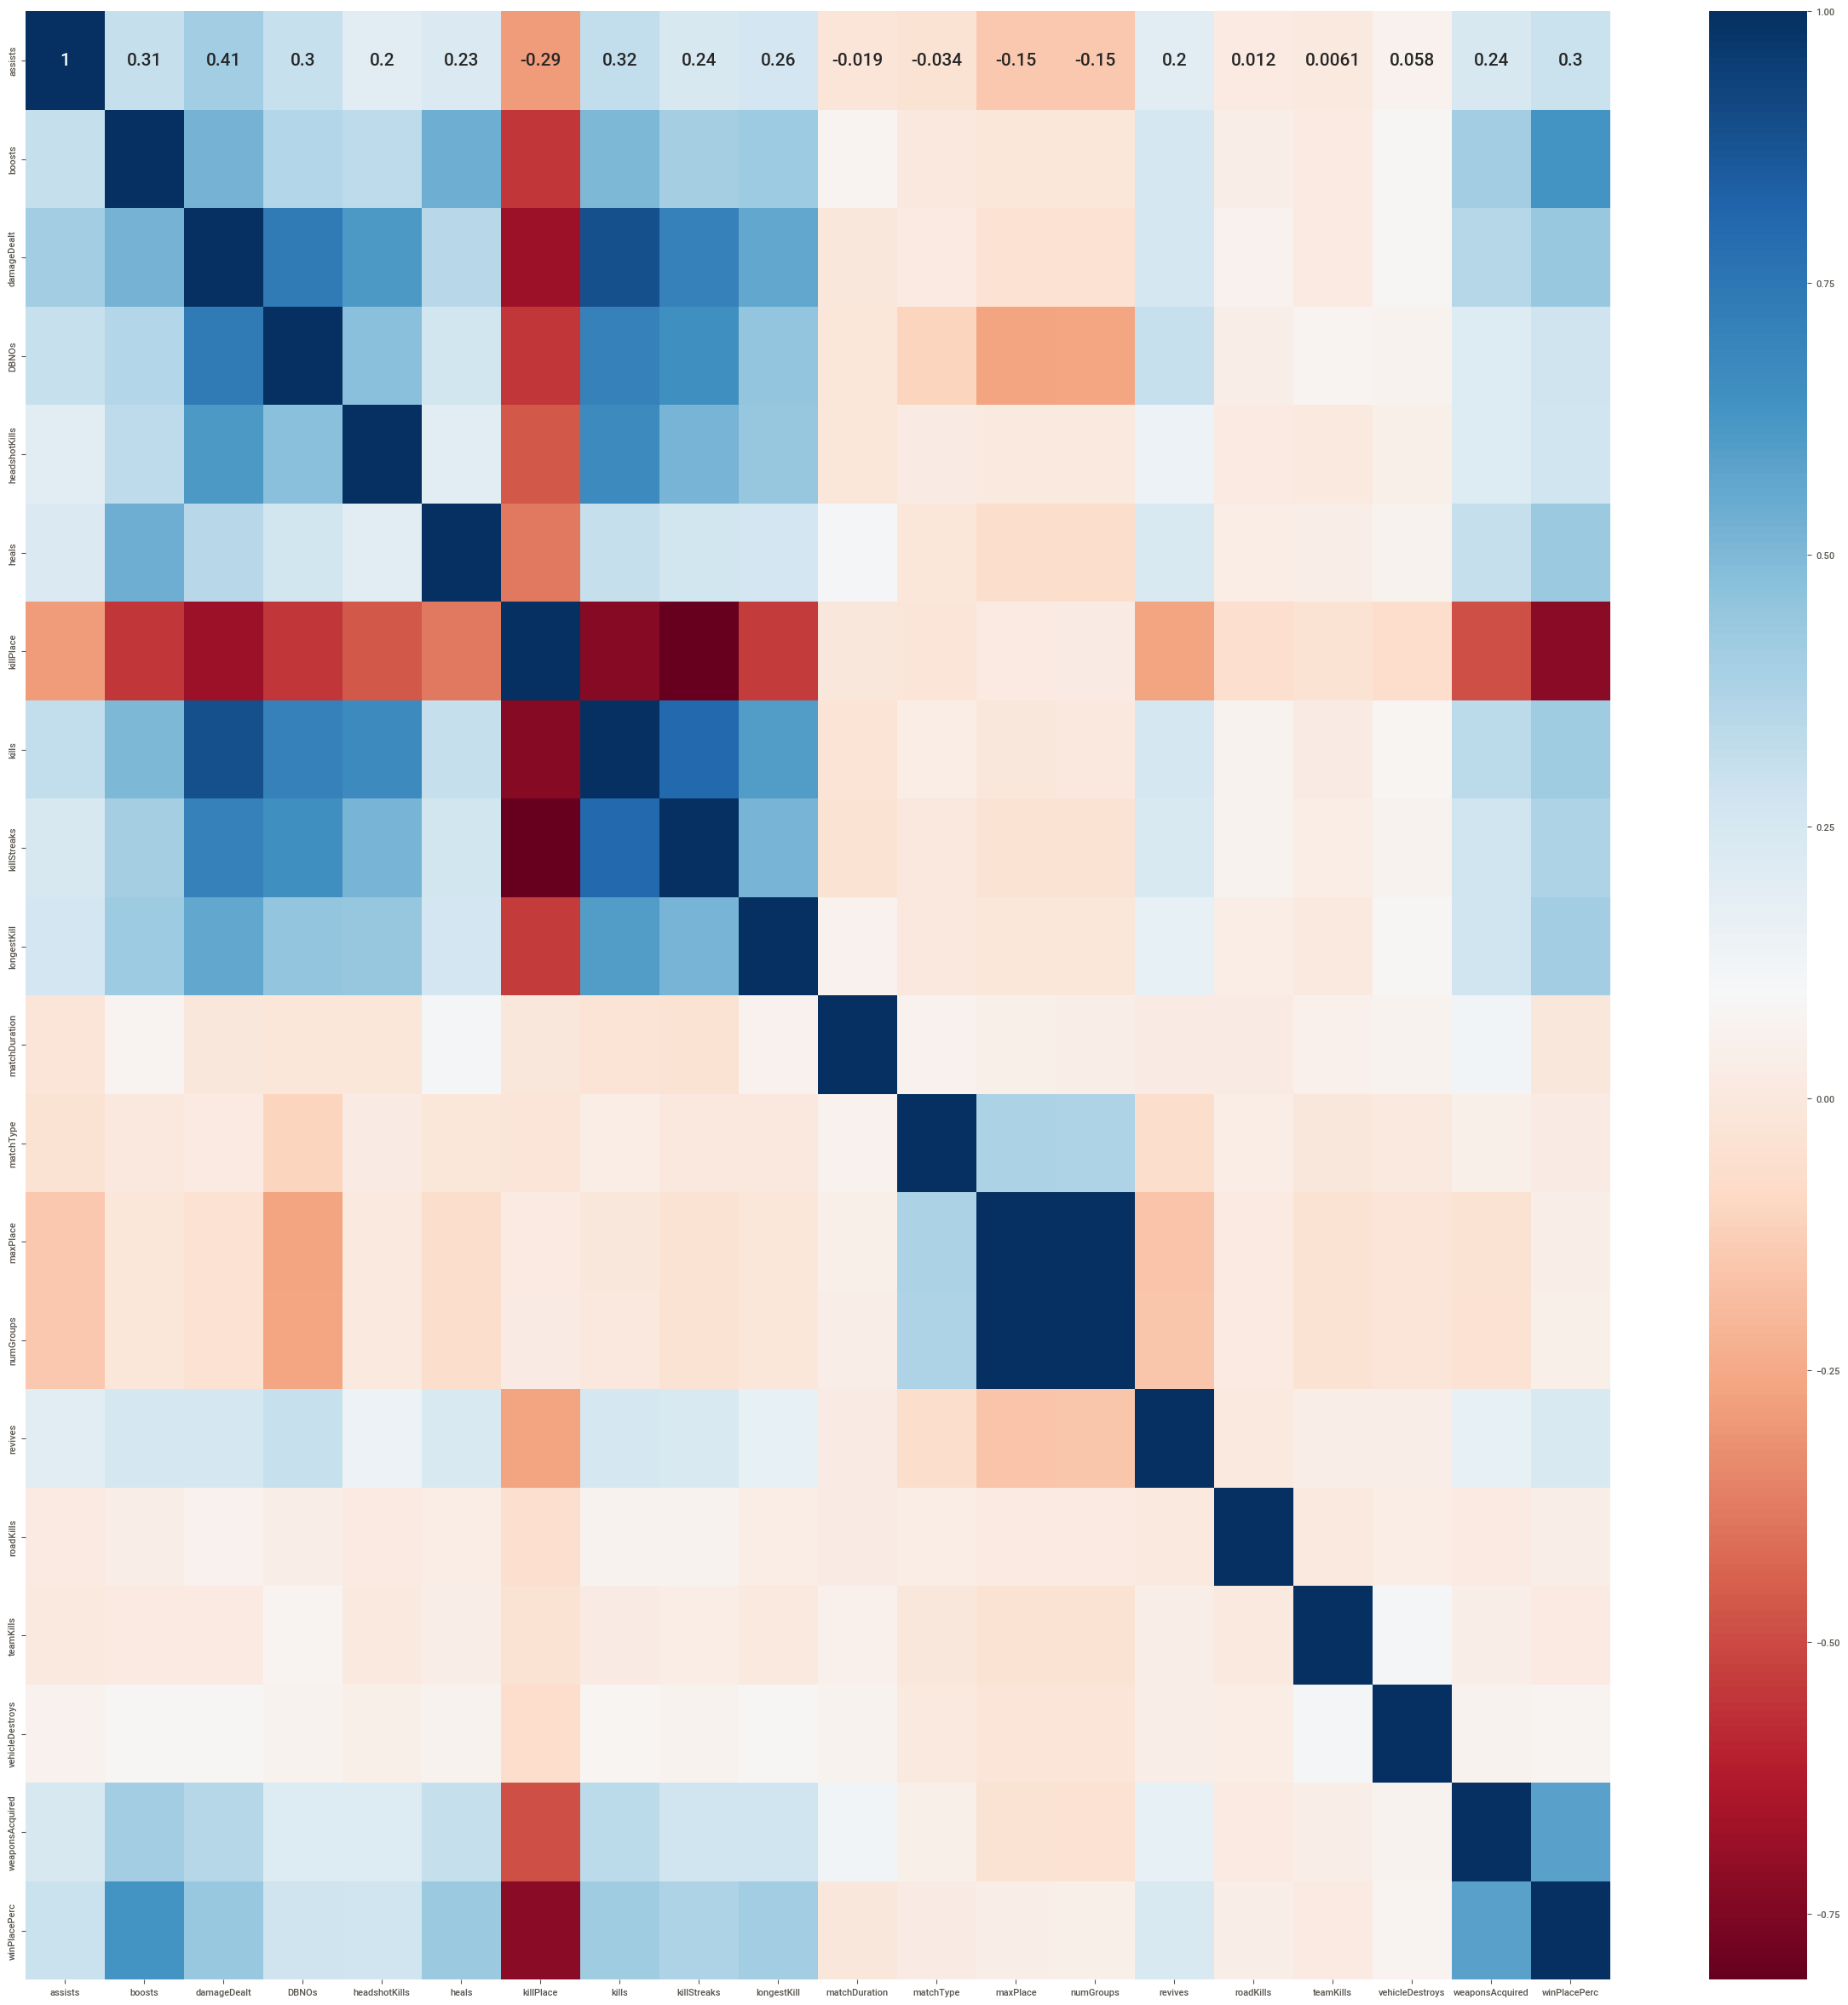

In [43]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdBu", annot_kws={"size":15})

## Spliting data

In [44]:
## x,y split

X = data_cleaned.drop(['winPlacePerc'],axis=1)
y = data_cleaned.winPlacePerc

In [45]:
## Train,test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=35)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3557572, 19)
(3557572,)
(889393, 19)
(889393,)


 # MODEL IMPLEMENTATION

In [49]:
## Importing The Algorthims

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


## Model 1 Linear regression

In [57]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred1=model.predict(X_test)

In [62]:
mse1=mean_squared_error(y_test,y_pred)

In [63]:
mse1

0.2537039282132222

In [64]:
r2score1=r2_score(y_test,y_pred)
r2score1

0.7459443616366496

## Model- 2 Decision Tree

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
decision_tree = DecisionTreeRegressor()

In [70]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [71]:
y_pred2 = decision_tree.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.20195164455614062


In [73]:
r2_score(y_test,y_pred2)

0.7977683895650268

## Model -3 RandomForestRegression

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
random_forest = RandomForestRegressor(n_estimators=25, random_state=42)

In [51]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=42)

In [74]:
y_pred3 = random_forest.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_pred3)
print("Mean Squared Error:", mse)
r2_score(y_test,y_pred3)

Mean Squared Error: 0.10603216727587447


0.8938208401657775

Linear Regression R2 Score: 0.7459443616366496
Decision Tree R2 Score: 0.7977683895650268
Random Forest R2 Score: 0.8938208401657775


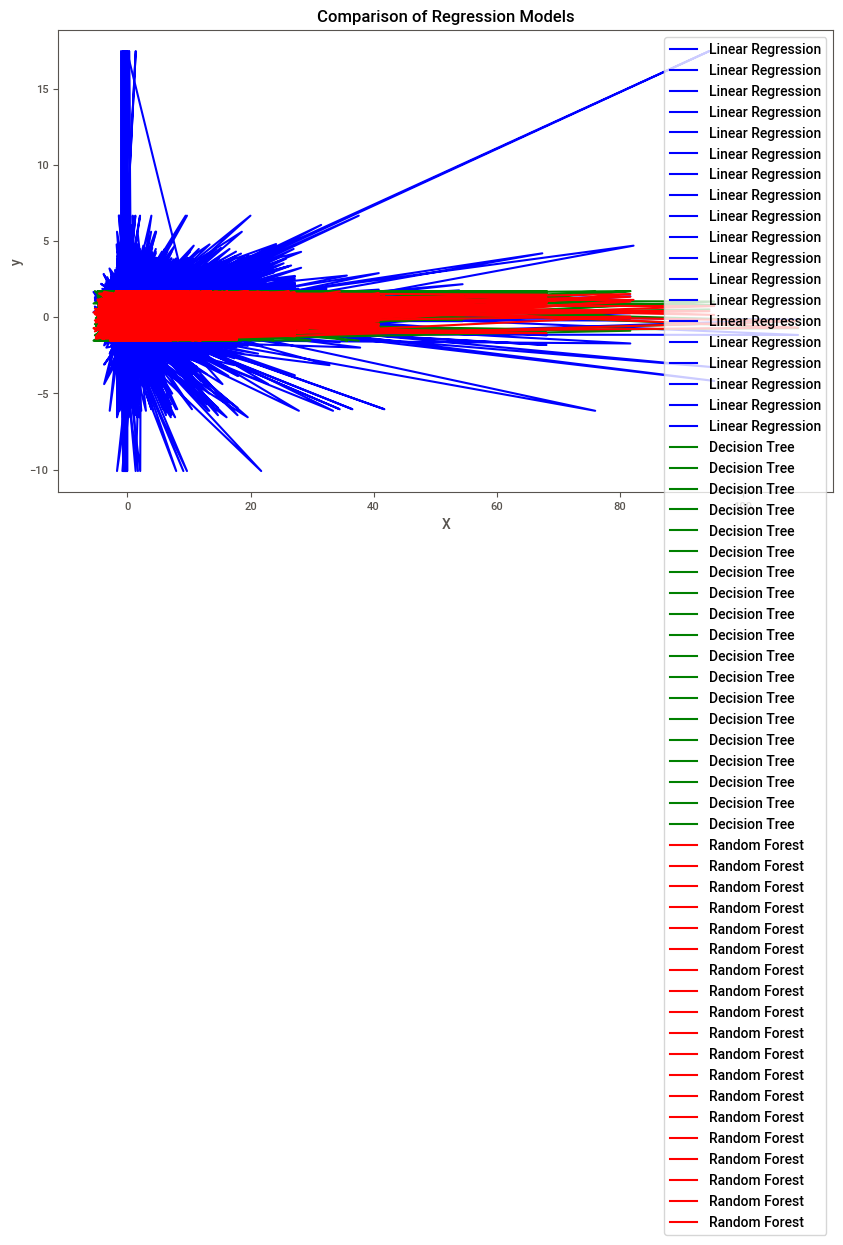

In [81]:
# Predictions on the test data
y_pred1 =model.predict(X_test)
y_pred2 = decision_tree.predict(X_test)
y_pred3 = random_forest.predict(X_test)

# Calculate R2 score
linear_r2 = r2_score(y_test,y_pred1)
tree_r2 = r2_score(y_test,y_pred2)
forest_r2 = r2_score(y_test,y_pred3)

# Printing the R2 score
print("Linear Regression R2 Score:", linear_r2)
print("Decision Tree R2 Score:", tree_r2)
print("Random Forest R2 Score:", forest_r2)

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(X_test, y_pred1, color='blue', label='Linear Regression')
plt.plot(X_test, y_pred2, color='green', label='Decision Tree')
plt.plot(X_test, y_pred3, color='red', label='Random Forest')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

- Among the three algorithms (Linear Regression, Decision Tree Regressor, and Random Forest Regression), the Random Forest Regressor achieved the highest R-squared score. This indicates that the Random Forest Regressor better captures the variance in the target variable compared to the other two regression algorithms. Therefore, I recommend using the Random Forest Regressor for the GameWinnerPred (PUBG) dataset. This recommendation is based on its superior performance in explaining the relationship between the features and the target variable when compared to Linear Regression and Decision Tree Regressor.

## conclusion

- The importance of the factors mentioned above can fluctuate significantly based on several factors, including the player's skill level, individual playstyle preferences, and the unique dynamics of each PUBG game session. Since different players may excel in various aspects of the game and adopt distinct strategies, certain factors might hold more significance for some players compared to others. Additionally, the specific circumstances within each match, such as the composition of opposing teams and the geographical layout of the game map, can also influence the relevance of these factors.
- 
Ty understand the impact of these variables on predicting win probability, it is crucial to conduct a thorough analysis using a dataset of PUBG game data. By leveraging machine learning algorithms, researchers and analysts can systematically evaluate the contribution of each factos determini towardsng tof winni ofng a match. Through this process, patterns and correlations within the data can be identified, allowing for a more accurate assessment of the factors that play importantal role in achieving victory in PUBG. This data-driven approach enables the development of predictive models that not only account for the diverse range of player behaviors and game dynamics but also provide actionable insights for players looking to enhance their gameplay strategies and maximize their chances of success.






